<a href="https://colab.research.google.com/github/SanghunOh/with_data_analytics/blob/main/codes/%EC%A3%BC%ED%83%9D%EC%8B%A4%EA%B1%B0%EB%9E%98%EA%B0%80_%EC%A0%84%EA%B5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###from : http://rtdown.molit.go.kr/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path_root = '/content/drive/MyDrive/datas/'

# 작업 경로 설정
import os
os.chdir(path_root)
!pwd

/content/drive/.shortcut-targets-by-id/1tHYgEz3lQF-LmtFPXRgMBDh4UN54qeAs/datas


In [3]:
import pandas as pd


In [4]:
data_df = pd.read_csv('./아파트(매매)__실거래가_20220712230621.csv', encoding='cp949', header=15)

data_df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,강원도 강릉시 견소동,202,0202,0,송정한신,39.080,202205,7,"16,000",10,1997,경강로2539번길 8,NaN,중개거래,강원 강릉시
1,강원도 강릉시 견소동,202,0202,0,송정한신,84.945,202205,24,"26,700",13,1997,경강로2539번길 8,NaN,중개거래,강원 강릉시
2,강원도 강릉시 견소동,289,0289,0,송정해변신도브래뉴아파트,84.990,202205,2,"33,800",14,2005,경강로2539번길 22,NaN,직거래,-
3,강원도 강릉시 견소동,289,0289,0,송정해변신도브래뉴아파트,84.990,202205,19,"33,700",3,2005,경강로2539번길 22,NaN,중개거래,강원 강릉시
4,강원도 강릉시 견소동,289,0289,0,송정해변신도브래뉴아파트,84.990,202205,23,"30,000",2,2005,경강로2539번길 22,NaN,직거래,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31781,충청북도 충주시 호암동,1063,1063,0,충주호암두진하트리움아파트,77.946,202205,27,"38,000",1,2019,호암수청2로 78,NaN,직거래,-
31782,충청북도 충주시 호암동,558-16,0558,16,한양,59.840,202205,10,"7,000",5,1994,예성로 9,NaN,중개거래,충북 충주시
31783,충청북도 충주시 호암동,547-6,0547,6,호반현대,59.760,202205,7,"12,000",10,1994,신촌2길 29,NaN,중개거래,충북 충주시
31784,충청북도 충주시 호암동,221-23,0221,23,호암리버빌(1단지),84.680,202205,27,"19,800",1,2002,원호암5길 32,NaN,중개거래,충북 충주시


In [5]:
data_df.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명', '해제사유발생일', '거래유형', '중개사소재지'],
      dtype='object')

##해제사유건 삭제

In [6]:
data_df = data_df.drop(index=data_df[data_df['해제사유발생일'].notnull()].index)

In [7]:
data_df[data_df['해제사유발생일'].notnull()]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지


##필요 컬럼만 사용과 단위 처리

In [8]:
columns = ['시군구', '전용면적(㎡)', '거래금액(만원)', '층', '건축년도']
contents_df = data_df[columns].copy()
contents_df.head()

,시군구,전용면적(㎡),거래금액(만원),층,건축년도
0,강원도 강릉시 견소동,39.080,"16,000",10,1997
1,강원도 강릉시 견소동,84.945,"26,700",13,1997
2,강원도 강릉시 견소동,84.990,"33,800",14,2005
3,강원도 강릉시 견소동,84.990,"33,700",3,2005
4,강원도 강릉시 견소동,84.990,"30,000",2,2005


In [9]:
contents_df.dtypes

시군구          object
전용면적(㎡)     float64
거래금액(만원)     object
층             int64
건축년도          int64
dtype: object

In [10]:
contents_df['전용면적'] = contents_df['전용면적(㎡)'].astype('int32')

In [11]:
contents_df['거래금액'] = contents_df['거래금액(만원)'].str.replace(',','').astype('int64')

##시도별 매매가 분석

In [12]:
contents_df['시도'] = contents_df['시군구'].str.split(' ').str[0]
contents_df['시도'].nunique(), contents_df['시도'].unique(), 

(17, array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
        '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
        '충청남도', '충청북도'], dtype=object))

In [13]:
contents_df['전용면적'].value_counts()

84     8225
59     7214
49     1555
39      840
74      473
       ... 
204       1
195       1
214       1
236       1
185       1
Name: 전용면적, Length: 210, dtype: int64

In [14]:
contents_square_84 = contents_df[contents_df['전용면적'] == 84].copy()
contents_square_84

,시군구,전용면적(㎡),거래금액(만원),층,건축년도,전용면적,거래금액,시도
1,강원도 강릉시 견소동,84.9450,"26,700",13,1997,84,26700,강원도
2,강원도 강릉시 견소동,84.9900,"33,800",14,2005,84,33800,강원도
3,강원도 강릉시 견소동,84.9900,"33,700",3,2005,84,33700,강원도
4,강원도 강릉시 견소동,84.9900,"30,000",2,2005,84,30000,강원도
6,강원도 강릉시 견소동,84.9900,"38,000",14,2005,84,38000,강원도
...,...,...,...,...,...,...,...,...
31649,충청북도 충주시 칠금동,84.8700,"23,000",4,1997,84,23000,충청북도
31678,충청북도 충주시 호암동,84.9980,"31,200",13,2007,84,31200,충청북도
31778,충청북도 충주시 호암동,84.9712,"47,500",9,2019,84,47500,충청북도
31784,충청북도 충주시 호암동,84.6800,"19,800",1,2002,84,19800,충청북도


###최대,최소,중간값 구하기

In [15]:
contents_square_84_mean = contents_square_84.groupby('시도')['거래금액'].mean()
contents_square_84_mean

시도
강원도         26372.940426
경기도         54468.970913
경상남도        27557.520897
경상북도        24034.598673
광주광역시       35406.346405
대구광역시       35842.040816
대전광역시       41121.554404
부산광역시       41230.175926
서울특별시      131251.212938
세종특별자치시     63126.153846
울산광역시       35215.871951
인천광역시       49575.416382
전라남도        23575.260054
전라북도        25511.789474
제주특별자치도     40109.090909
충청남도        26110.484685
충청북도        28625.856397
Name: 거래금액, dtype: float64

In [16]:
contents_square_84_max = contents_square_84.groupby('시도')['거래금액'].max()
contents_square_84_min = contents_square_84.groupby('시도')['거래금액'].min()
contents_square_84_median = contents_square_84.groupby('시도')['거래금액'].median()

In [17]:
contents_square_84_prices = pd.concat([contents_square_84_mean,contents_square_84_max,contents_square_84_min,contents_square_84_median], axis=1)
contents_square_84_prices

,거래금액,거래금액,거래금액,거래금액
시도,,,,
강원도,26372.940426,64000,5800,24645.0
경기도,54468.970913,191000,9000,49900.0
경상남도,27557.520897,89500,6000,24900.0
경상북도,24034.598673,60000,4500,22700.0
광주광역시,35406.346405,96000,13000,32000.0
대구광역시,35842.040816,130000,13900,32700.0
대전광역시,41121.554404,122000,13200,41300.0
부산광역시,41230.175926,135000,10000,36150.0
서울특별시,131251.212938,430000,43000,113000.0


In [18]:
contents_square_84_prices.columns = ['평균', '최대', '최소', '중간']
contents_square_84_prices

,평균,최대,최소,중간
시도,,,,
강원도,26372.940426,64000,5800,24645.0
경기도,54468.970913,191000,9000,49900.0
경상남도,27557.520897,89500,6000,24900.0
경상북도,24034.598673,60000,4500,22700.0
광주광역시,35406.346405,96000,13000,32000.0
대구광역시,35842.040816,130000,13900,32700.0
대전광역시,41121.554404,122000,13200,41300.0
부산광역시,41230.175926,135000,10000,36150.0
서울특별시,131251.212938,430000,43000,113000.0


In [19]:
contents_square_84_prices['평균'] = round(contents_square_84_prices['평균'], 1)

In [20]:
contents_square_84_prices.sort_values('평균', ascending=False, inplace=True)

###다중 막대 시각화

In [21]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [22]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [31]:
import numpy as np
xindexs = np.arange(1, len(contents_square_84_prices)+1)
xindexs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

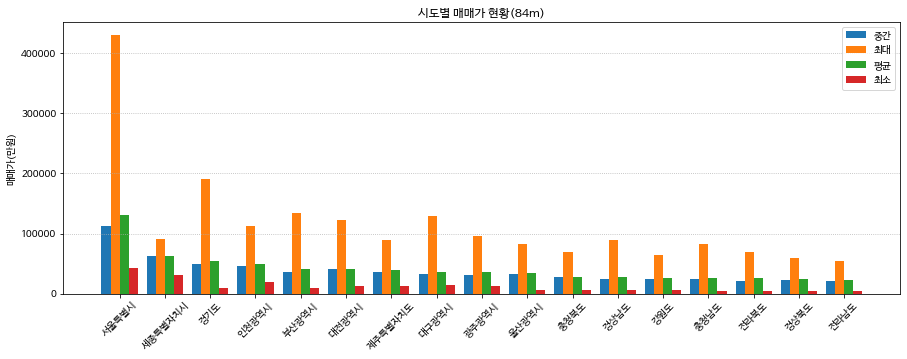

In [35]:
plt.rcParams['figure.figsize'] = (15,5)
# plt.bar(contents_square_84_prices.index, contents_square_84_prices['중간'], label='중간', width=0.2, )
# plt.bar(contents_square_84_prices.index, contents_square_84_prices['최대'], label='최대', width=0.2)
# plt.bar(contents_square_84_prices.index, contents_square_84_prices['평균'], label='평균', width=0.2)
# plt.bar(contents_square_84_prices.index, contents_square_84_prices['최소'], label='최소', width=0.2)
plt.bar(xindexs-0.3, contents_square_84_prices['중간'], label='중간', width=0.2, )
plt.bar(xindexs-0.1, contents_square_84_prices['최대'], label='최대', width=0.2)
plt.bar(xindexs+0.1, contents_square_84_prices['평균'], label='평균', width=0.2)
plt.bar(xindexs+0.3, contents_square_84_prices['최소'], label='최소', width=0.2)

plt.legend()
plt.xticks(xindexs, labels=contents_square_84_prices.index, rotation=45)
plt.grid(axis='y', ls=':')
plt.title('시도별 매매가 현황(84m)')
plt.ylabel('매매가(만원)')
plt.show()